<a href="https://colab.research.google.com/github/tomeliud/Neural-Network-Basic-Needs-Basic-Rights-Kenya---Tech4MentalHealth/blob/master/Neural_Network_Basic_Needs_Basic_Rights_Kenya_Tech4MentalHealth_Tweaking_the_Model_nlp_tweaking_the_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import TensorFlow and related functions

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Load the dataset


In [ ]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('Train.csv') 
dataset

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression
...,...,...,...
611,BOHSNXCN,What should I do to stop alcoholism?,Alcohol
612,GVDXRQPY,How to become my oldself again,Suicide
613,IO4JHIQS,How can someone stop it?,Alcohol
614,1DS3P1XO,I feel unworthy,Depression


In [ ]:
sentences = dataset['text'].tolist()
sentences 

['I feel that it was better I dieAm happy',
 'Why do I get hallucinations?',
 'I am stresseed due to lack of financial support in school',
 'Why is life important?',
 'How could I be helped to go through the depression?',
 'What are the effects of depression to ones health',
 'Why is everything so hard to deal with in this life',
 ' I feel emotionally overwhelmed ',
 'How to manage taking alcohol?',
 'Is heaven open for us who smoke bhang?',
 'How to survive without money?',
 'How do i stop this? What do I do when life becomes unbearable?',
 'I was ever sad,alone and always on drugsNow I know how to cope with negative aspects in my life',
 'I feel empty,absent minded',
 'I experienced depression in my studies',
 'I feel like am alone in this world',
 'I feel low and out of place',
 'What should i do to get out of depression?',
 'How can I stop using alcohol?',
 'I feel hopeless, unworthy and useless …How do I cope with stress and frorge the past?',
 'Does mediataton help stop weed addi

In [ ]:
### Create the necessary dummy variables
dataset[['Drugs','Depression','Suicide','Alcohol']]=pd.get_dummies(dataset['label'])
### Create the necessary dummy variables
dataset.columns
labels=dataset.drop(['ID','text','label'],axis=1)
labels 


,Drugs,Depression,Suicide,Alcohol
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
611,1,0,0,0
612,0,0,0,1
613,1,0,0,0
614,0,1,0,0


In [ ]:
# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)
training_size

492

In [ ]:
training_sentences = sentences[0:training_size]
training_sentences

['I feel that it was better I dieAm happy',
 'Why do I get hallucinations?',
 'I am stresseed due to lack of financial support in school',
 'Why is life important?',
 'How could I be helped to go through the depression?',
 'What are the effects of depression to ones health',
 'Why is everything so hard to deal with in this life',
 ' I feel emotionally overwhelmed ',
 'How to manage taking alcohol?',
 'Is heaven open for us who smoke bhang?',
 'How to survive without money?',
 'How do i stop this? What do I do when life becomes unbearable?',
 'I was ever sad,alone and always on drugsNow I know how to cope with negative aspects in my life',
 'I feel empty,absent minded',
 'I experienced depression in my studies',
 'I feel like am alone in this world',
 'I feel low and out of place',
 'What should i do to get out of depression?',
 'How can I stop using alcohol?',
 'I feel hopeless, unworthy and useless …How do I cope with stress and frorge the past?',
 'Does mediataton help stop weed addi

In [ ]:
testing_sentences = sentences[training_size:]
testing_sentences

['How can I stop the drinking habit?',
 'I want to give up',
 'I was felling stressed and low. How can I cope with the situation',
 'I take alcohol for stress management.',
 'Why am I depressed?',
 'What are the causes of depression',
 'What are the coping mechanisms and prevention of depression',
 'How can I quit alcoholism',
 'Is alcohol harmful to my health',
 'If one looses a close relative, what advice could she be given?',
 'Is alcohol a good stress remover?',
 'I am lonely',
 'I lack interest in my life',
 'Is little consumption harmful? Owing the fact that I dont misbehave',
 ' Financial I am okay',
 'what would I do to do away with my problems',
 'How can i motivate myself',
 'Is it possible for one to avoid taking bhang?',
 'what is the best way to avoid alcohol',
 'I felt worhtless and like I did not deserve to be alive',
 'I feel so low',
 'I feel alone ,how can I get better?',
 'I feel rejected,alone and frustratedi live one day at a time',
 ' I feel so low and I want to i

In [ ]:
training_labels = labels[0:training_size]
training_labels

,Drugs,Depression,Suicide,Alcohol
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
487,0,1,0,0
488,0,0,1,0
489,0,1,0,0
490,0,0,0,1


In [ ]:
testing_labels = labels[training_size:]
testing_labels 

,Drugs,Depression,Suicide,Alcohol
492,1,0,0,0
493,0,1,0,0
494,0,1,0,0
495,1,0,0,0
496,0,1,0,0
...,...,...,...,...
611,1,0,0,0
612,0,0,0,1
613,1,0,0,0
614,0,1,0,0


In [ ]:
# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
len(training_labels_final)

492

In [ ]:
testing_labels_final = np.array(testing_labels)
testing_labels_final 

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0,

## Tokenize the dataset (with tweaks!)




In [ ]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## Train a Sentiment Model (with tweaks!)

using `GlobalAveragePooling1D` instead of `Flatten()`.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 260       
Total params: 9,620
Trainable params: 9,620
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1000
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))
#Epoch 1000/1000
#16/16 [==============================] - 0s 6ms/step - loss: 9.7339e-07 - accuracy: 1.0000 - val_loss: 4.1634 - val_accuracy: 0.6694
#Epoch 1000/1000
#16/16 [==============================] - 0s 6ms/step - loss: 5.7958e-06 - accuracy: 1.0000 - val_loss: 2.8540 - val_accuracy: 0.7016

Epoch 1/1000
16/16 [==============================] - 0s 11ms/step - loss: 0.6844 - accuracy: 0.4756 - val_loss: 0.6737 - val_accuracy: 0.5161
Epoch 2/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.6594 - accuracy: 0.5854 - val_loss: 0.6461 - val_accuracy: 0.5161
Epoch 3/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.6219 - accuracy: 0.5854 - val_loss: 0.6046 - val_accuracy: 0.5161
Epoch 4/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.5687 - accuracy: 0.5854 - val_loss: 0.5526 - val_accuracy: 0.5161
Epoch 5/1000
16/16 [==============================] - 0s 8ms/step - loss: 0.5101 - accuracy: 0.5854 - val_loss: 0.5127 - val_accuracy: 0.5161
Epoch 6/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.4720 - accuracy: 0.5854 - val_loss: 0.5008 - val_accuracy: 0.5161
Epoch 7/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.4591 - accuracy: 0.5854 - val_loss: 0.4997 - val_accuracy: 0.5161
Epoch

## Visualize the training graph

You can use the code below to visualize the training and validation accuracy while you try out different tweaks to the hyperparameters and model.

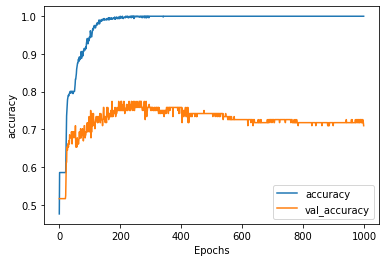

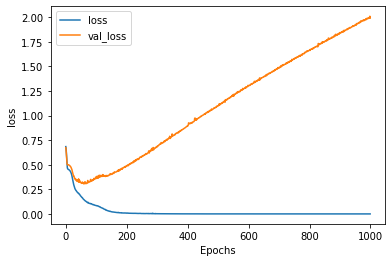

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## visualizing the network

The code below will download two files for visualizing how your network "sees" the sentiment related to each word. Head to http://projector.tensorflow.org/ and load these files, then click the checkbox to "sphereize" the data.

In [ ]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(500, 16)


In [ ]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Predicting Sentiment 

Use of the test dataset

In [ ]:
test = pd.read_csv('Test.csv')
test=test['text']
test

0              How to overcome bad feelings and emotions
1                         I feel like giving up in life 
2      I was so depressed feel like got no strength t...
3      I feel so low especially since I had no one to...
4           can i be successful when I am a drug addict?
                             ...                        
304                                                  Yes
305                              My girlfriend dumped me
306              How can I go back to being my old self?
307                      Is it true bhang is  medicinal?
308                      how can I overcome the problem?
Name: text, Length: 309, dtype: object

In [ ]:
# Use the model to predict a review
#test=test[test['text']]
test=np.array(test)
test  

array(['How to overcome bad feelings and emotions',
       'I feel like giving up in life ',
       'I was so depressed feel like got no strength to continue',
       'I feel so low especially since I had no one to talk to',
       ' can i be successful when I am a drug addict?',
       'I am dissapointed,I need a sense of closure', 'I lost hope',
       'I feel unloved and uncared for',
       'What are factors that leads to addiction of alcohol',
       'Is the advice of drinking moderatly ,prudent?',
       'How to limit myself from getting regular depression',
       'I needed to know whether the alcohol releases stress',
       ' I was sad and did not want to go out', 'Am I that ugly',
       'How should I avoid alcohol intake? what are the advantages of alcohol intake?',
       'I was pale and lost appetite',
       'I am going through loss of a loved one…I am going through a breakup',
       'What are the effects of bhang?',
       'Depressed due to the loss of a relative',
    

In [ ]:
# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(test)
test_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\PREDICTIONS!\n')              

classes = model.predict(test_padded)

#for x in range(len(test)):
for x in classes[0:1]:
  print(labels)
  #print(classes[x])
  print('\n')

\PREDICTIONS!

     Drugs  Depression  Suicide  Alcohol
0        0           1        0        0
1        0           0        1        0
2        0           1        0        0
3        0           0        0        1
4        0           1        0        0
..     ...         ...      ...      ...
611      1           0        0        0
612      0           0        0        1
613      1           0        0        0
614      0           1        0        0
615      0           1        0        0

[616 rows x 4 columns]




In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

!pip install -q tensorflow-hub
!pip install -q tfds-nightly
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.2.0
Eager mode:  True
Hub version:  0.8.0
GPU is available


In [ ]:
dataset=dataset['text']

In [ ]:
from sklearn.model_selection import train_test_split
# Split the training set into 60% and 40%, so we'll end up with 15,000 examples
# for training, 10,000 examples for validation and 25,000 examples for testing.
train_data, validation_data = train_test_split(dataset, test_size=0.3)

In [ ]:
validation_data=np.array(validation_data)
validation_data

array(['why am I thinking of suicide?', 'I feel so low',
       'How to overcome such an incident', 'How to stop?',
       'I asked if alcohol was a right solution to problems',
       'Relationship issues',
       'How should I overcome depression? Why must it be me?',
       'I feel like nobody cares', 'I am sad',
       'How to control my emotions. How to stop drinnking.',
       'I feel uncomfortable',
       'Is alccohol the only form of entertainment for the young adults?',
       'What more is life?',
       'What is the best way to withdraw from drugs?',
       'How can I avoid wasting my money on alcohol with friends',
       'whom should I disclose to my issues', 'How can i stop alcohol?',
       'Who could be the reason for depression?',
       'how can I feel good about myself?', 'I feel terrible',
       'what are the causes of depression?',
       'How do i stop this? What do I do when life becomes unbearable?',
       'Causes of alcoholism. ways in which one can do to st

In [ ]:
train_data=tf.convert_to_tensor(train_data, np.string_)
train_data

<tf.Tensor: shape=(431,), dtype=string, numpy=
array([b'I am sad', b'How to manage my relationship', b'Not experienced',
       b'I feel helpless', b'How can i stop taking alcohol?',
       b'how could I deal with the situation that was disturbing me',
       b'I feel heartbroken', b'Will i be criticized for taking weed?',
       b'Why is life so difficult?', b'How can I reduce my intake',
       b'what would I do to do away with my problems',
       b'I feel like I have wasted my life',
       b'What causes suicidal thoughts?', b'Is weed harmful?',
       b'Am I addicted?', b'how can I overcome depression',
       b'What is the benefit of alcohol',
       b'How do I seek for assistance with depression?',
       b'I am fearful of failure when I start drinking alcohol',
       b'When someone is depressed he/she feels down, discouraged and alone I feel out of this place, lonely and discouraged',
       b'I take alcohol for personal realization.',
       b'The loss of my beloved father',


In [ ]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_data[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 0.3059456 , -0.9068108 ,  1.2603941 , -0.3039218 , -2.3881705 ,
        -1.7477196 , -1.0697886 ,  1.2232646 ,  2.1851575 ,  1.0174063 ,
        -1.6288952 , -0.96641225,  1.7528644 ,  0.7269206 , -2.302045  ,
         0.4663383 ,  1.7607877 ,  0.02359715, -0.86390364, -0.37526697],
       [ 0.77927697, -1.2451519 ,  1.5900626 ,  0.16357362, -0.7037141 ,
        -0.89925253, -0.5814389 ,  1.156518  ,  0.5226284 ,  0.11347698,
        -0.7577803 , -0.18367136,  0.5100116 ,  0.7047137 , -1.499037  ,
        -0.35204145,  2.3237064 , -0.7384827 ,  0.01717305, -1.0229386 ],
       [-0.27932772, -1.2095166 ,  0.7476019 , -0.6893602 , -0.4369693 ,
        -0.59314394, -0.46767443,  0.03864701,  0.57772946, -0.903641  ,
         0.1307753 , -0.20151542,  0.6078339 , -0.01756126, -1.4037132 ,
         0.06915051,  0.66092545,  0.26128685,  0.12310074, -0.8022213 ]],
      dtype=float32)>

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_19 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________
